# Mini Project - Stock Price Prediction

In [46]:
import pandas as pd
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore")

### Reading CSV File

In [47]:
df = pd.read_csv('AXISBANK__EQ__NSE__NSE__MINUTE.csv')
df.head()

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,451.40,452.00,450.60,451.20,29198.0
1,2017-01-02 09:16:00+05:30,451.15,451.15,450.50,450.80,12539.0
2,2017-01-02 09:17:00+05:30,450.50,450.80,449.30,449.30,26833.0
3,2017-01-02 09:18:00+05:30,449.30,450.10,448.95,449.75,12067.0
4,2017-01-02 09:19:00+05:30,449.75,450.30,449.25,449.80,15675.0


In [48]:
df.shape

(297735, 6)

##### Setting Timestamp as an Index

In [49]:
newdf = df.set_index('timestamp')

In [50]:
newdf.head()

,open,high,low,close,volume
timestamp,,,,,
2017-01-02 09:15:00+05:30,451.40,452.00,450.60,451.20,29198.0
2017-01-02 09:16:00+05:30,451.15,451.15,450.50,450.80,12539.0
2017-01-02 09:17:00+05:30,450.50,450.80,449.30,449.30,26833.0
2017-01-02 09:18:00+05:30,449.30,450.10,448.95,449.75,12067.0
2017-01-02 09:19:00+05:30,449.75,450.30,449.25,449.80,15675.0


##### Converting to Datetime DataType

In [51]:
newdf.index = pd.to_datetime(newdf.index)

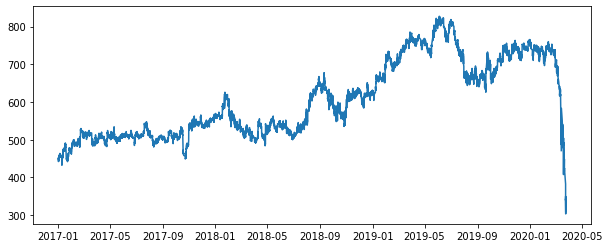

In [52]:
plt.figure(figsize=(10, 4))
plt.plot(newdf['close']);

In [53]:
data = newdf[['close']]
data.head()

,close
timestamp,
2017-01-02 09:15:00+05:30,451.20
2017-01-02 09:16:00+05:30,450.80
2017-01-02 09:17:00+05:30,449.30
2017-01-02 09:18:00+05:30,449.75
2017-01-02 09:19:00+05:30,449.80


In [54]:
forecast_out = 30

data['Prediction'] = data[['close']].shift(-forecast_out)
data.head()

,close,Prediction
timestamp,,
2017-01-02 09:15:00+05:30,451.20,445.8
2017-01-02 09:16:00+05:30,450.80,446.0
2017-01-02 09:17:00+05:30,449.30,446.3
2017-01-02 09:18:00+05:30,449.75,446.1
2017-01-02 09:19:00+05:30,449.80,445.8


##### Dropping Nan Values

In [55]:
data.dropna(inplace=True)
data.tail()

,close,Prediction
timestamp,,
2020-03-23 14:55:00+05:30,311.05,309.90
2020-03-23 14:56:00+05:30,310.15,312.00
2020-03-23 14:57:00+05:30,311.15,310.40
2020-03-23 14:58:00+05:30,312.65,309.25
2020-03-23 14:59:00+05:30,312.80,310.00


#### Creating Feature Array

In [56]:
X = np.array(data.drop(['Prediction'], 1))

In [57]:
X = X[:-forecast_out]

#### Creating Label Array

In [58]:
Y = np.array(data['Prediction'])

In [59]:
Y = Y[:-forecast_out]

#### Splitting Train and Test Data

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### SGD Regression

In [88]:
sgd_reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
sgd_reg.fit(X_train, Y_train)a

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [89]:
sgd_confidence = sgd_reg.score(X_test, Y_test)
print("SGD Confidence Score: ", sgd_confidence)

SGD Confidence Score:  0.9990228161166367


In [90]:
sgd_prediction = sgd_reg.predict(X_forecast)

In [92]:
data3  = pd.DataFrame(data['close'][-forecast_out:])
data3['SGD Regression Prediction'] = sgd_prediction

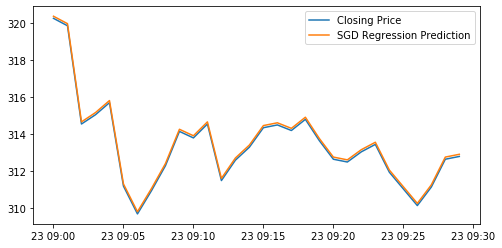

In [93]:
plt.figure(figsize=(8, 4))
plt.plot(data3['close'], label='Closing Price')
plt.plot(data3['SGD Regression Prediction'], label='SGD Regression Prediction');
plt.legend();

In [94]:
Y_pred = sgd_prediction

In [95]:
mean_squared_error(Y_true, Y_pred, squared=False)

0.11583746213519214

In [96]:
mean_absolute_error(Y_true, Y_pred)

0.11583283655607299